# Segmentation de la base de données clients

In [25]:
import pandas as pd
import numpy as np
import sklearn as skl
import matplotlib.pyplot as plt
import yellowbrick

## Importation de la base de données RFM

In [31]:
df = pd.read_csv('RFM.csv')
df = df.drop(columns = ['Unnamed: 0']) 
# Suppression d'outlier

outlier = df['Monetary'].max()
print(outlier)
df.drop(df.loc[df['Monetary'] > 352].index, inplace=True)
df.describe()


109312.64


,Recency,Frequency,Monetary
count,82696.000000,82696.000000,82696.000000
mean,242.972925,1.023738,118.334955
std,153.015993,0.160355,75.888750
min,1.000000,1.000000,8.860000
25%,119.000000,1.000000,58.710000
50%,224.000000,1.000000,98.665000
75%,353.000000,1.000000,161.080000
max,729.000000,6.000000,351.990000


In [32]:
df.head()

,customer_unique_id,Recency,Frequency,order_purchase_timestamp,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,2018-04-24 16:16:53,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,2018-01-31 18:55:36,27.19
2,0000f46a3911fa3c0805444483337064,542,1,2018-07-09 21:18:01,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,2018-08-03 08:55:50,43.62
4,0004aac84e0df4da2b147fca70cf8255,293,1,2018-04-11 01:06:37,196.89


## Utilisation de la méthode ELBOW pour déterminer le nombre de clusters optimaux

In [33]:
X = df[['Recency',
       'Frequency',
       'Monetary']]

X.head()

,Recency,Frequency,Monetary
0,116,1,141.90
1,119,1,27.19
2,542,1,86.22
3,326,1,43.62
4,293,1,196.89


In [34]:
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

scaler = Normalizer()
X_scaled = X.copy()
X_scaled['Frequency'] = X_scaled['Frequency'] * 100
X_scaled = scaler.fit_transform(X_scaled)

print(X_scaled)

[[0.5555927  0.47895923 0.67964314]
 [0.75412737 0.63372048 0.1723086 ]
 [0.97158537 0.17925929 0.15455736]
 ...
 [0.96719882 0.1687956  0.18982754]
 [0.59625711 0.48085251 0.64285172]
 [0.96980709 0.19832456 0.14192105]]


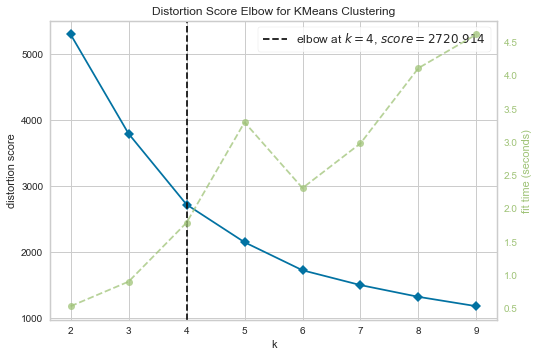

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster.elbow import kelbow_visualizer



model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(X_scaled)        
visualizer.show()        

## Test sur différents modèles avec n_clusters = 4

### Kmeans

C:\Users\Lucas\AppData\Local\Temp/ipykernel_7772/1145098422.py:6: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)
C:\Users\Lucas\AppData\Local\Temp/ipykernel_7772/1145098422.py:29: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


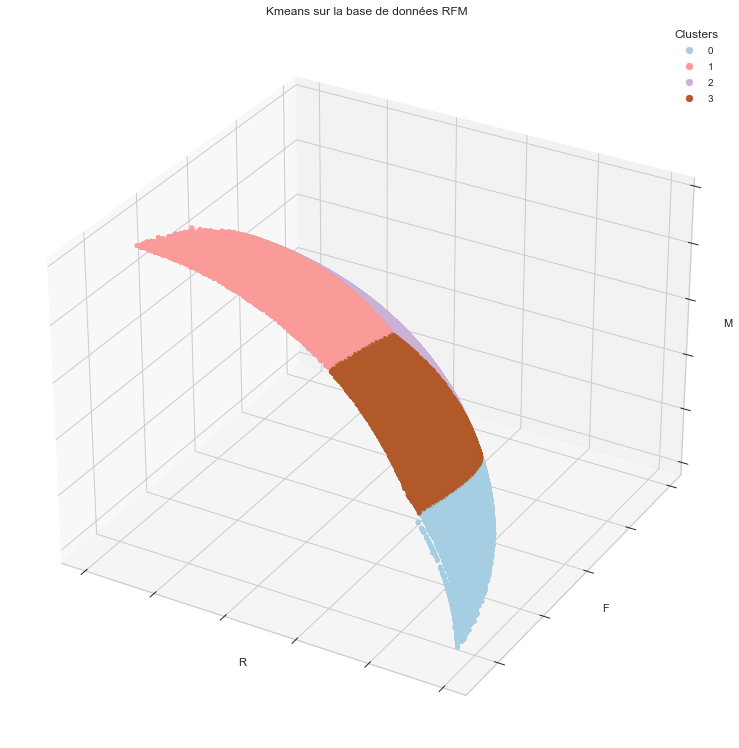

<Figure size 720x720 with 0 Axes>

In [36]:
from mpl_toolkits.mplot3d import Axes3D

est = KMeans(n_clusters = 4)

fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
fig.add_axes(ax)
est.fit(X_scaled)
labels = est.labels_

ax.scatter(X_scaled[:,0], X_scaled[:,1], X_scaled[:,2],
               c=labels.astype(float), edgecolor= None,cmap = 'Paired') 
scatter = ax.scatter(X_scaled[:,0], X_scaled[:,1], X_scaled[:,2],
               c=labels.astype(float), edgecolor= None,cmap = 'Paired') 

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('R')
ax.set_ylabel('F')
ax.set_zlabel('M')
handles, labels = scatter.legend_elements(prop="colors")
ax.legend(handles, labels, loc="upper right", title="Clusters")
ax.set_title('Kmeans sur la base de données RFM')


fig = plt.figure(figsize=(10, 10))

fig.show()

### Mini Batch Kmeans

C:\Users\Lucas\AppData\Local\Temp/ipykernel_7772/1195162776.py:8: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)
C:\Users\Lucas\AppData\Local\Temp/ipykernel_7772/1195162776.py:29: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


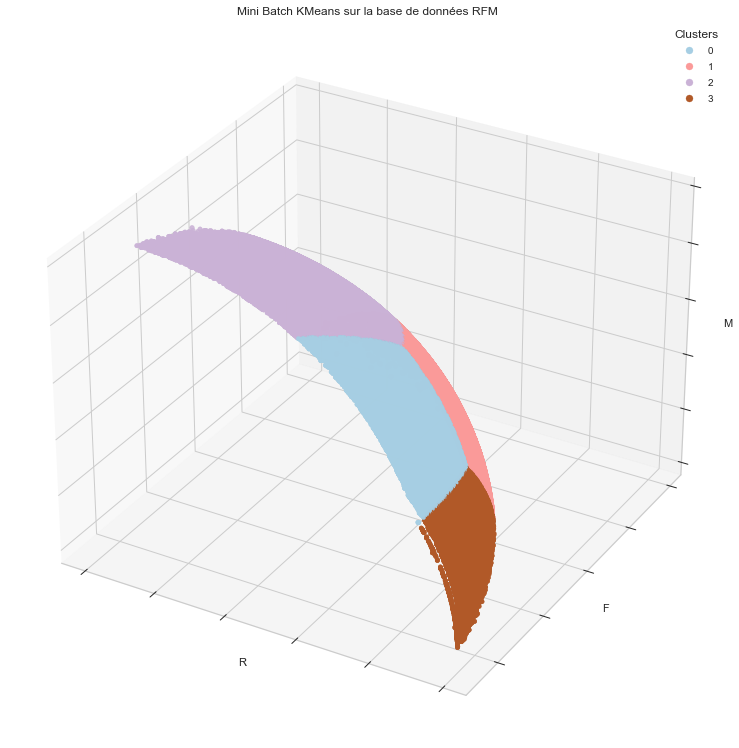

<Figure size 720x720 with 0 Axes>

In [37]:
from sklearn.cluster import MiniBatchKMeans

est = MiniBatchKMeans(n_clusters = 4)
est.fit(X_scaled)
labels = est.labels_

fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
fig.add_axes(ax)

ax.scatter(X_scaled[:,0], X_scaled[:,1], X_scaled[:,2],
               c=labels.astype(float), edgecolor= None,cmap = 'Paired') 
scatter = ax.scatter(X_scaled[:,0], X_scaled[:,1], X_scaled[:,2],
               c=labels.astype(float), edgecolor= None,cmap = 'Paired') 

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('R')
ax.set_ylabel('F')
ax.set_zlabel('M')
handles, labels = scatter.legend_elements(prop="colors")
ax.legend(handles, labels, loc="upper right", title="Clusters")
ax.set_title('Mini Batch KMeans sur la base de données RFM')


fig = plt.figure(figsize=(10, 10))

fig.show()

### Dendrogramme

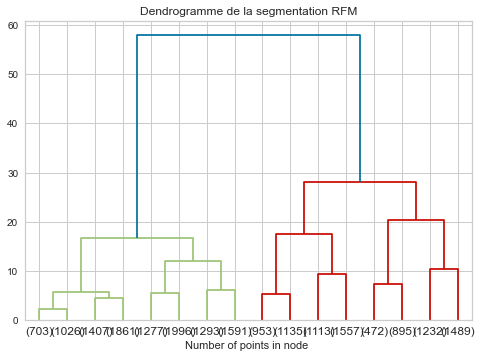

In [38]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X_scaled[0:20000,:])
plt.title('Dendrogramme de la segmentation RFM')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node ")
plt.show()

# Contrat de maintenance 

Etude de la qualité des clusters trouvés

### Silhouette score

The score is bounded between -1 for incorrect clustering and +1 for highly dense clustering. Scores around zero indicate overlapping clusters.

The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.

In [40]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X_scaled)
labels = kmeans.labels_
print('Silhouette score : \n',metrics.silhouette_score(X_scaled, labels, metric='euclidean'))

	 Silhouette score : 
 0.43050739942449856


### Calinski-Harabasz Index

If the ground truth labels are not known, the Calinski-Harabasz index (sklearn.metrics.calinski_harabasz_score) - also known as the Variance Ratio Criterion - can be used to evaluate the model, where a higher Calinski-Harabasz score relates to a model with better defined clusters.

The index is the ratio of the sum of between-clusters dispersion and of within-cluster dispersion for all clusters (where dispersion is defined as the sum of distances squared)

- The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.

- The score is fast to compute.

In [41]:
from sklearn.metrics import pairwise_distances

print('Calinski-Harabasz Index : \n ',metrics.calinski_harabasz_score(X_scaled, labels))

	 Calinski-Harabasz Index : 
  100605.05108656829


### Davies-Bouldin Index

If the ground truth labels are not known, the Davies-Bouldin index can be used to evaluate the model, where a lower Davies-Bouldin index relates to a model with better separation between the clusters.

This index signifies the average ‘similarity’ between clusters, where the similarity is a measure that compares the distance between clusters with the size of the clusters themselves.

Zero is the lowest possible score. Values closer to zero indicate a better partition.

In [42]:
from sklearn.metrics import davies_bouldin_score

print('davies bouldin score :',davies_bouldin_score(X_scaled, labels))

davies bouldin score : 0.8617701648869773
